In [2]:
# from google.colab import drive

# drive.mount("/content/drive")
# import pandas as pd

# df = pd.read_csv(
#     "/content/drive/MyDrive/Maestría En Ciencia de Datos/Segundo Trimestre/MachineLearning1/FinalProject/data/classification.csv"
# )

In [3]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    PrecisionRecallDisplay as PRDisplay,
)

import numpy as np

In [6]:
df = pd.read_csv("../data/classification.csv")

In [7]:
display(df.head())

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,-2.388741,6.221087,3.442447,1.273807,0.912272,8.908027,8.441999,-2.607863,-7.539959,5.810530,-6.960356,-2.460638,-9.276179,-4.184623,-8.896234,2
1,-6.012792,-9.884413,-1.590610,4.999943,0.247758,-1.197048,-10.939272,1.533927,7.638279,6.033323,6.045052,-7.453784,8.672267,7.474841,-6.603927,0
2,2.270829,-8.849332,-6.619179,-2.861520,-6.720253,5.715418,6.493857,-4.429523,-3.821490,-6.438497,-8.818146,3.422536,3.376605,-8.850959,-0.717626,1
3,-7.092421,-10.254081,-0.907321,3.712683,-0.567676,0.254027,-10.135377,-0.412888,8.421732,6.706882,4.189576,-7.909424,8.303048,8.711827,-6.575260,0
4,-2.246293,7.617936,3.580218,2.412760,3.881735,8.096439,8.372886,-4.655989,-4.807351,5.980022,-9.098483,-2.709957,-9.063194,-4.737577,-8.630724,2


In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1497 non-null   float64
 2   X3      1500 non-null   float64
 3   X4      1497 non-null   float64
 4   X5      1499 non-null   float64
 5   X6      1500 non-null   float64
 6   X7      1499 non-null   float64
 7   X8      1499 non-null   float64
 8   X9      1500 non-null   float64
 9   X10     1498 non-null   float64
 10  X11     1498 non-null   float64
 11  X12     1499 non-null   float64
 12  X13     1499 non-null   float64
 13  X14     1500 non-null   float64
 14  X15     1500 non-null   float64
 15  Y       1500 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 187.6 KB


None

In [9]:
display(df.describe())

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
count,1500.000000,1497.000000,1500.000000,1497.000000,1499.000000,1500.000000,1499.000000,1499.000000,1500.000000,1498.000000,1498.000000,1499.000000,1499.000000,1500.000000,1500.000000,1500.000000
mean,-1.883910,-4.075099,-1.382158,0.920043,-2.471415,4.634421,2.112540,-2.174120,0.030046,1.693476,-4.200176,-2.092793,0.364311,-1.789200,-5.253161,1.000000
std,3.834396,7.897076,5.051711,3.539492,3.470882,3.955879,8.510537,1.729567,6.403340,6.744790,6.244312,5.019266,6.929017,6.713716,3.604286,0.816769
min,-9.028149,-13.311122,-10.556390,-6.713349,-10.050322,-3.461197,-12.871957,-5.879455,-8.092116,-10.879760,-11.958360,-11.674289,-11.888570,-11.886751,-11.533303,0.000000
25%,-5.695571,-9.919480,-7.157683,-2.919740,-6.301859,0.371108,-8.982112,-3.523258,-4.819111,-7.075972,-8.866134,-7.156965,-8.045253,-8.207881,-8.090071,0.000000
50%,-1.986221,-8.899808,-0.788744,2.032352,-1.602947,5.129056,6.295880,-2.547017,-3.543957,5.560343,-7.848457,-2.642599,1.913803,-3.520108,-6.762037,1.000000
75%,1.998095,6.259801,3.629647,3.778093,0.507027,8.334606,9.074141,-0.788418,8.205810,6.782746,3.801478,3.464049,7.215220,6.430320,-1.055850,2.000000
max,6.040819,11.162159,7.478247,7.514823,3.915434,12.017239,12.307936,3.351869,12.243760,9.963494,7.883623,7.369420,10.548179,10.408096,2.208405,2.000000


In [10]:
null_values = df.isnull().sum()
print("Number of null values in each column:")
display(null_values[null_values > 0])

Number of null values in each column:


X2     3
X4     3
X5     1
X7     1
X8     1
X10    2
X11    2
X12    1
X13    1
dtype: int64

In [11]:
df.fillna(df.mean(), inplace=True)
null_values = df.isnull().sum()
display(null_values[null_values > 0])

Series([], dtype: int64)

In [12]:
display(df.dtypes)
for column in df.columns:
    if df[column].dtype == "object":
        display(f"Unique values for categorical column '{column}':")
        display(df[column].unique())
    elif df[column].nunique() < 10:
        display(f"Unique values for potential categorical column '{column}':")
        display(df[column].unique())

X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
Y        int64
dtype: object

"Unique values for potential categorical column 'Y':"

array([2, 0, 1])

In [13]:
scaler = StandardScaler()

In [14]:
x_features = df.drop("Y", axis=1)
scaled_features = scaler.fit_transform(x_features)

In [15]:
df[x_features.columns] = scaled_features
display(df.head())

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,-0.131703,1.305539,0.955362,0.100081,0.975529,1.080678,0.744217,-0.250948,-1.182591,0.611017,-0.442474,-0.073335,-1.392250,-0.356914,-1.011098,2
1,-1.077160,-0.736611,-0.041278,1.154219,0.783947,-1.474619,-1.534630,2.145347,1.188563,0.644081,1.642373,-1.068795,1.199809,1.380328,-0.374892,0
2,1.083906,-0.605365,-1.037028,-1.069819,-1.224955,0.273355,0.515154,-1.304898,-0.601689,-1.206875,-0.740289,1.099565,0.435026,-1.052191,1.258792,1
3,-1.358818,-0.783485,0.094027,0.790049,0.548855,-1.107682,-1.440108,1.018988,1.310954,0.744045,1.344929,-1.159634,1.146488,1.564637,-0.366935,0
4,-0.094540,1.482657,0.982644,0.422296,1.831635,0.875450,0.736090,-1.435923,-0.755701,0.636171,-0.785229,-0.123041,-1.361491,-0.439304,-0.937409,2


In [16]:
display(df.describe())

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
count,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1500.000000
mean,-7.105427e-18,-1.776357e-18,1.421085e-17,1.065814e-17,4.736952e-17,-8.526513e-17,-2.605323e-17,-8.526513e-17,-3.789561e-17,-1.539509e-17,2.368476e-18,-2.013204e-17,-2.368476e-17,1.421085e-17,9.533115e-17,1.000000
std,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,0.816769
min,-1.863819e+00,-1.171112e+00,-1.816670e+00,-2.159516e+00,-2.185025e+00,-2.047160e+00,-1.761874e+00,-2.143778e+00,-1.268849e+00,-1.866007e+00,-1.243685e+00,-1.910217e+00,-1.769523e+00,-1.504520e+00,-1.742990e+00,0.000000
25%,-9.944023e-01,-7.405048e-01,-1.143662e+00,-1.086101e+00,-1.104274e+00,-1.078075e+00,-1.304473e+00,-7.804063e-01,-7.575381e-01,-1.300450e+00,-7.477744e-01,-1.009538e+00,-1.214472e+00,-9.563737e-01,-7.873560e-01,0.000000
50%,-2.669134e-02,-6.113164e-01,1.175071e-01,3.139088e-01,2.499241e-01,1.250797e-01,4.906286e-01,-2.093939e-01,-5.583328e-01,5.731543e-01,-5.845571e-01,-1.094785e-01,2.235101e-01,-2.579026e-01,-4.187735e-01,1.000000
75%,1.012754e+00,1.309899e+00,9.924313e-01,8.083161e-01,8.581320e-01,9.356754e-01,8.184007e-01,8.016991e-01,1.277223e+00,7.549301e-01,1.282501e+00,1.106832e+00,9.892133e-01,1.224696e+00,1.164922e+00,2.000000
max,2.067437e+00,1.932059e+00,1.754526e+00,1.865689e+00,1.841351e+00,1.866912e+00,1.198773e+00,3.197145e+00,1.908033e+00,1.227362e+00,1.937107e+00,1.886437e+00,1.470723e+00,1.817379e+00,2.070883e+00,2.000000


In [17]:
X = df.drop("Y", axis=1)

In [18]:
y = df["Y"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
logistic_model = LogisticRegression()

In [21]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = logistic_model.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 1.0


In [24]:
lda_model = LinearDiscriminantAnalysis()

In [25]:
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [26]:
y_pred_lda = lda_model.predict(X_test)

In [27]:
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"Linear Discriminant Analysis Accuracy: {accuracy_lda}")

Linear Discriminant Analysis Accuracy: 1.0


In [28]:
qda_model = QuadraticDiscriminantAnalysis()

In [29]:
qda_model.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [30]:
y_pred_qda = qda_model.predict(X_test)

In [31]:
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f"Quadratic Discriminant Analysis Accuracy: {accuracy_qda}")

Quadratic Discriminant Analysis Accuracy: 1.0


In [32]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [33]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
y_pred_knn = knn_model.predict(X_test)

In [35]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Classification Accuracy: {accuracy_knn}")

K-Nearest Neighbors Classification Accuracy: 1.0


In [36]:
models = {
    "Logistic Regression": logistic_model,
    "LDA": lda_model,
    "QDA": qda_model,
    "KNN": knn_model,
}

In [37]:
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    PrecisionRecallDisplay,
)
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": logistic_model,
    "LDA": lda_model,
    "QDA": qda_model,
    "KNN": knn_model,
}

for name, model in models.items():
    print(f"Evaluating {name}:")
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1-score (weighted): {f1:.4f}")
    print("-" * 30)

Evaluating Logistic Regression:
Confusion Matrix:
[[ 87   0   0]
 [  0 112   0]
 [  0   0 101]]
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-score (weighted): 1.0000
------------------------------
Evaluating LDA:
Confusion Matrix:
[[ 87   0   0]
 [  0 112   0]
 [  0   0 101]]
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-score (weighted): 1.0000
------------------------------
Evaluating QDA:
Confusion Matrix:
[[ 87   0   0]
 [  0 112   0]
 [  0   0 101]]
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-score (weighted): 1.0000
------------------------------
Evaluating KNN:
Confusion Matrix:
[[ 87   0   0]
 [  0 112   0]
 [  0   0 101]]
Precision (weighted): 1.0000
Recall (weighted): 1.0000
F1-score (weighted): 1.0000
------------------------------


In [38]:
param_grid_logistic = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],
}

In [39]:
grid_search_logistic = GridSearchCV(
    LogisticRegression(), param_grid_logistic, cv=5, scoring="accuracy"
)

In [40]:
grid_search_logistic.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [41]:
print("Best parameters for Logistic Regression:", grid_search_logistic.best_params_)
print("Best accuracy for Logistic Regression:", grid_search_logistic.best_score_)

Best parameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 1.0


In [42]:
display(df.corr()["Y"].sort_values(ascending=False))

Y      1.000000
X6     0.964112
X7     0.928760
X2     0.858778
X1     0.468053
X12    0.419679
X3     0.413604
X5     0.313666
X10   -0.070467
X15   -0.206560
X4    -0.264609
X14   -0.652486
X8    -0.728787
X11   -0.863108
X9    -0.902045
X13   -0.977363
Name: Y, dtype: float64

In [43]:
features = df.columns.drop("Y")

In [44]:
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

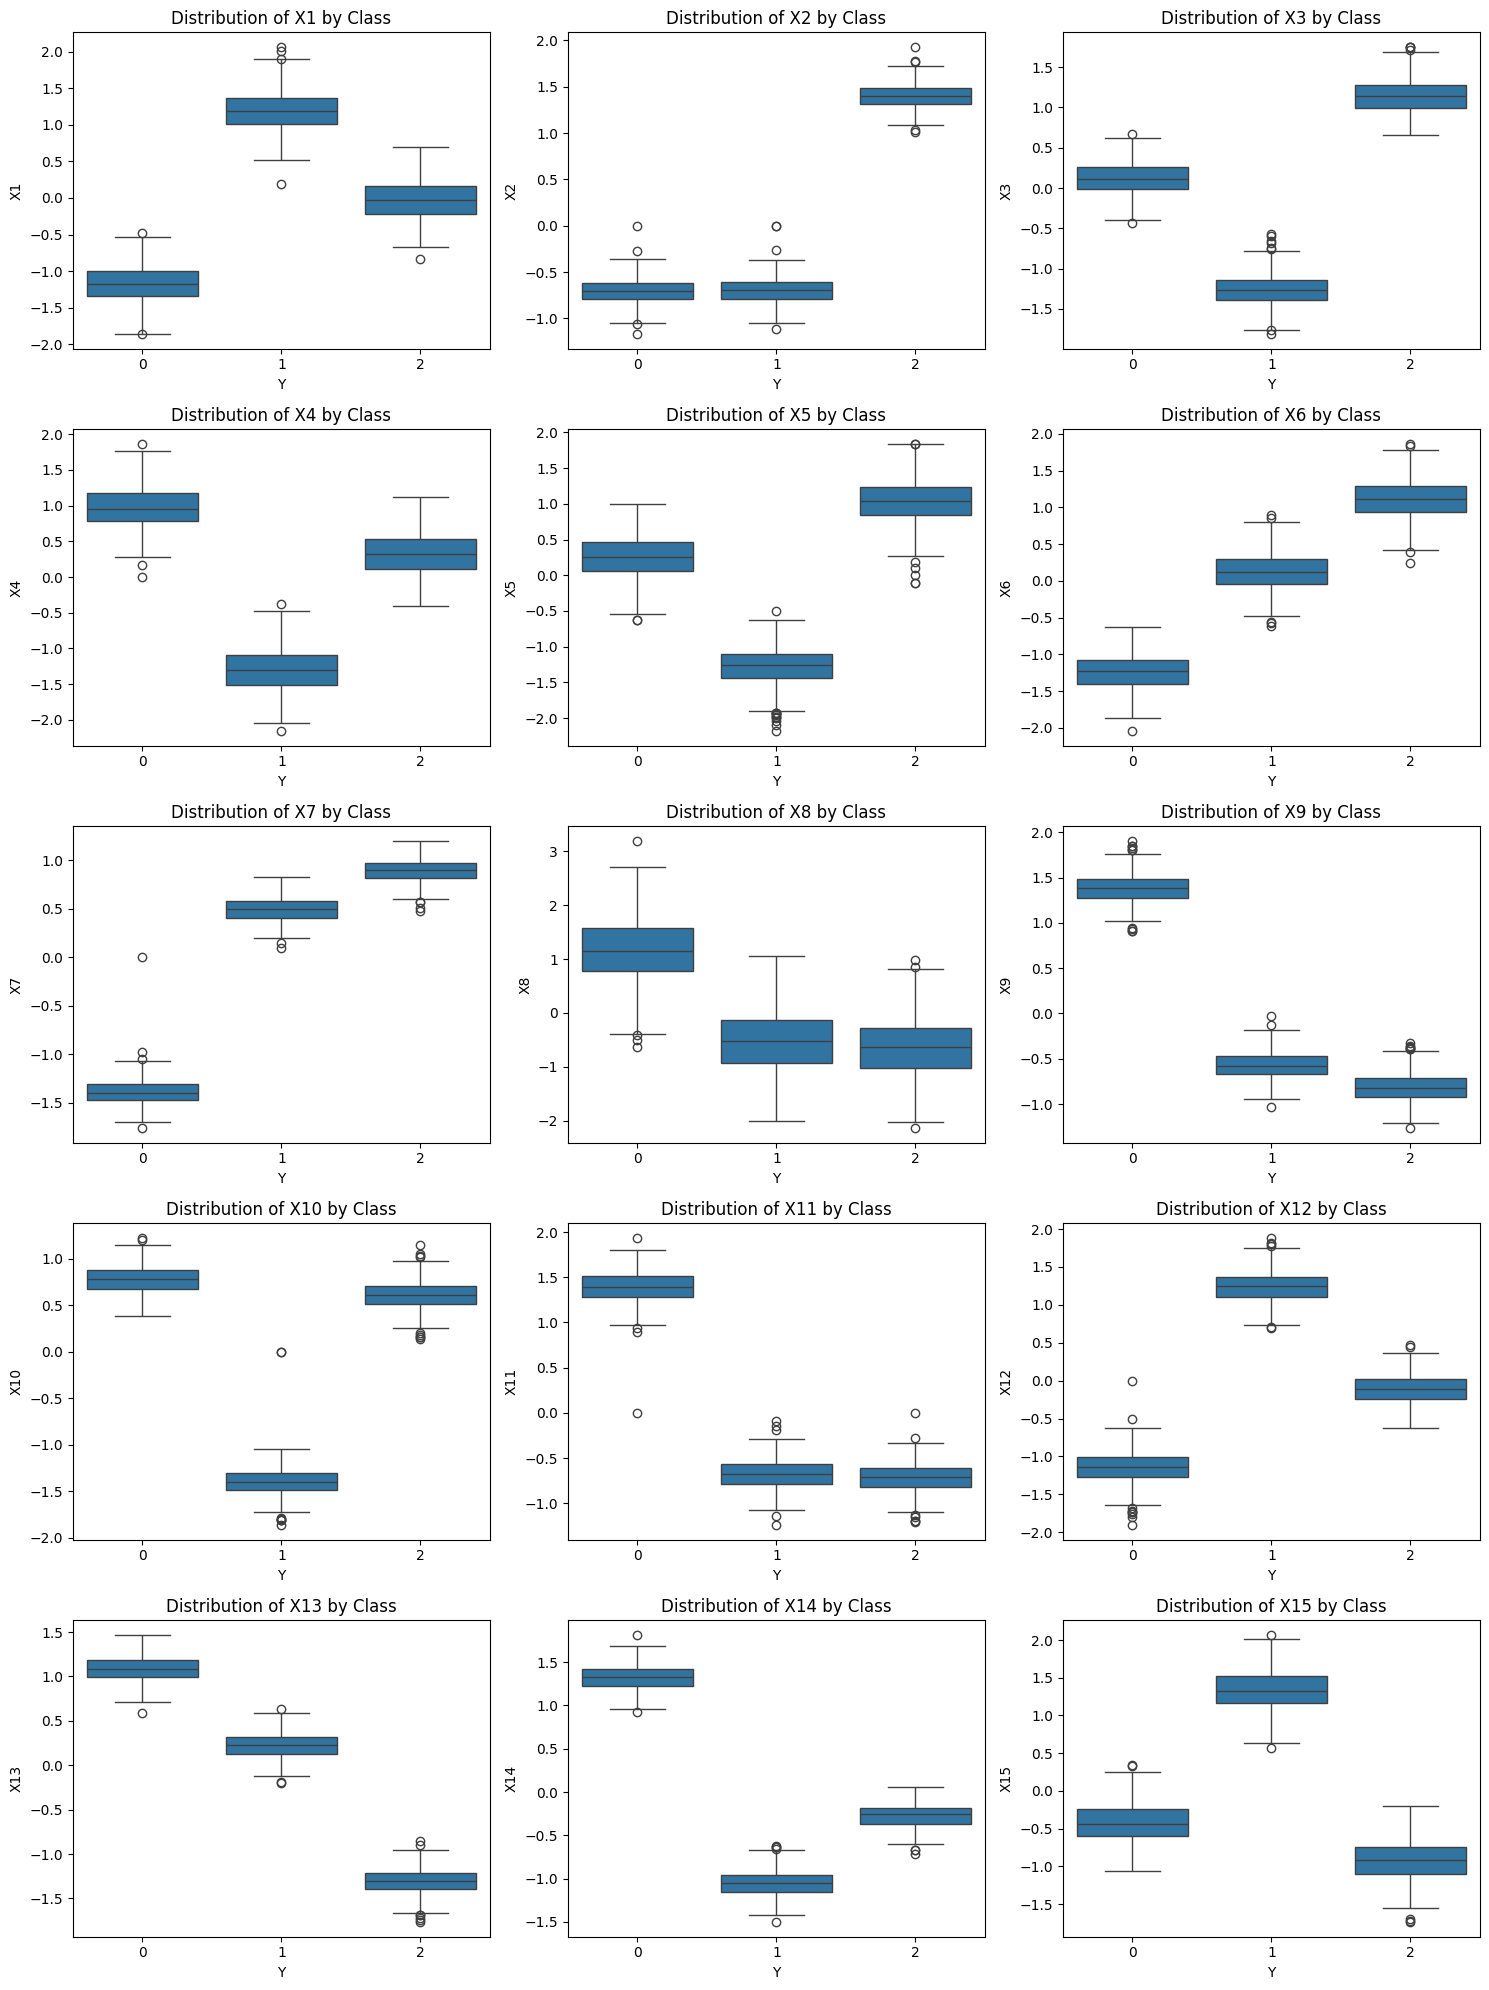

In [45]:
plt.figure(figsize=(15, n_rows * 4))
for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x="Y", y=feature, data=df)
    plt.title(f"Distribution of {feature} by Class")
plt.tight_layout()
plt.show()

In [46]:
high_corr_features = ["X6", "X7", "X2", "X13"]
n_high_corr = len(high_corr_features)
n_scatter_plots = n_high_corr * (n_high_corr - 1) // 2
n_cols_scatter = 3
n_rows_scatter = (n_scatter_plots + n_cols_scatter - 1) // n_cols_scatter

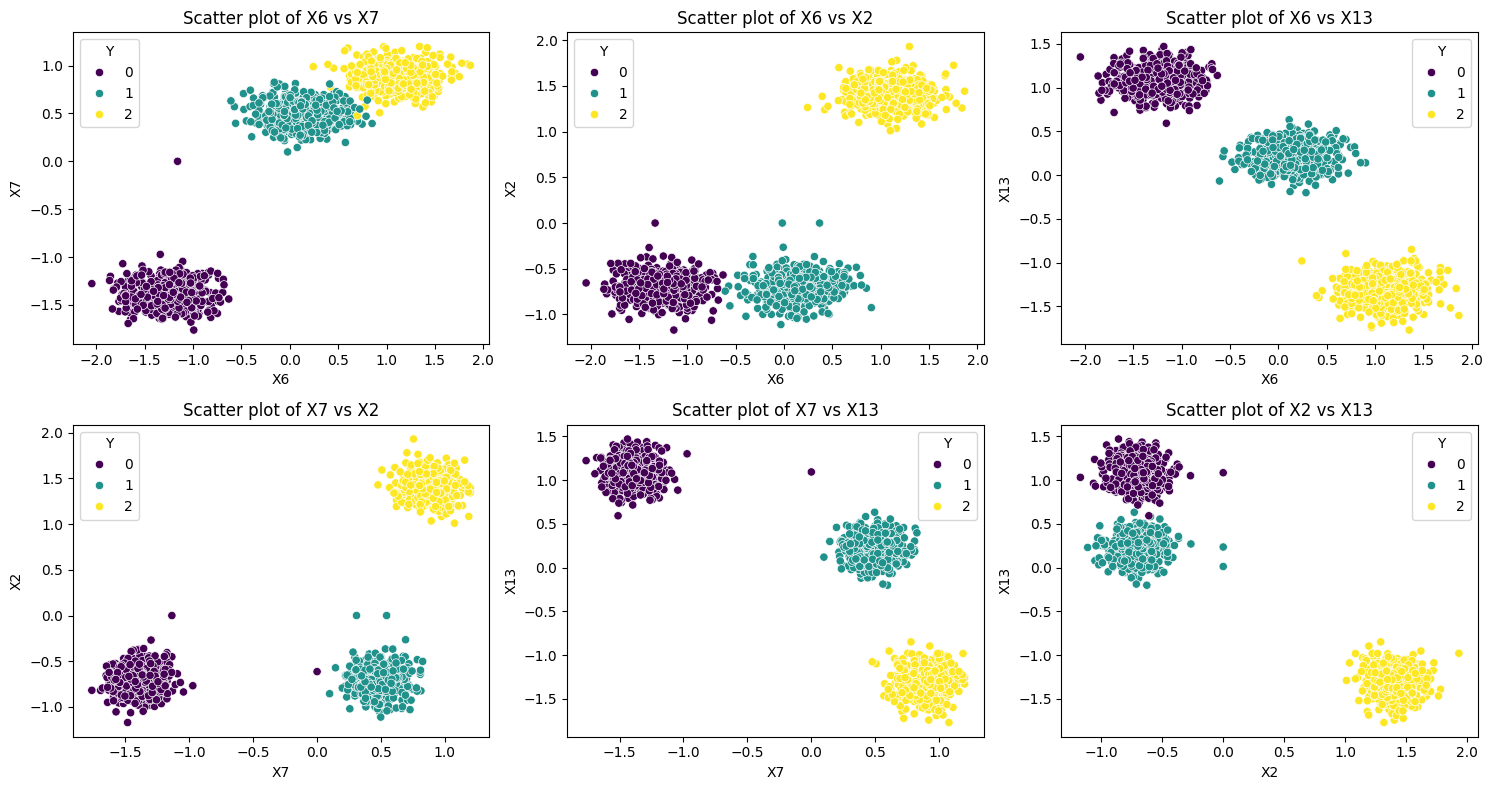

In [47]:
plt.figure(figsize=(15, n_rows_scatter * 4))
plot_index = 1
for i in range(n_high_corr):
    for j in range(i + 1, n_high_corr):
        feature1 = high_corr_features[i]
        feature2 = high_corr_features[j]
        plt.subplot(n_rows_scatter, n_cols_scatter, plot_index)
        sns.scatterplot(data=df, x=feature1, y=feature2, hue="Y", palette="viridis")
        plt.title(f"Scatter plot of {feature1} vs {feature2}")
        plot_index += 1
plt.tight_layout()
plt.show()

In [48]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
df_pca["Y"] = y.reset_index(drop=True)

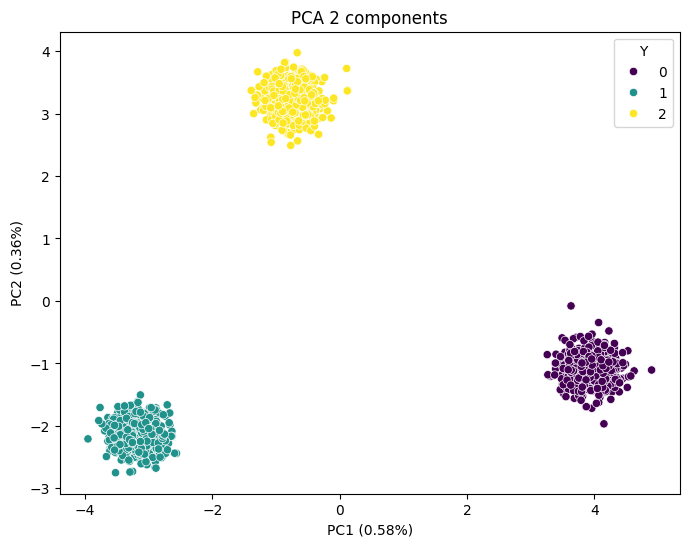

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Y", palette="viridis")
plt.title("PCA 2 components")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2f}%)")
plt.show()

In [50]:
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(X)
df_pca_3d = pd.DataFrame(data=pca_result_3d, columns=["PC1", "PC2", "PC3"])
df_pca_3d["Y"] = y.reset_index(drop=True)

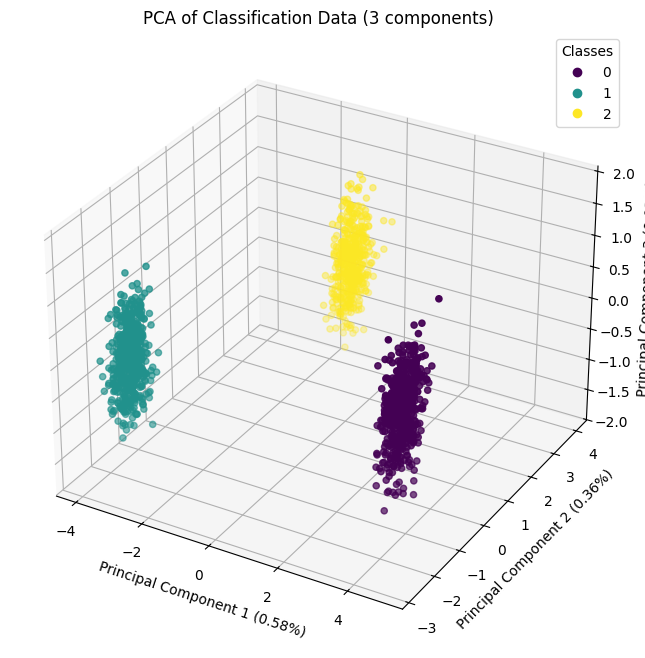

In [51]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(
    df_pca_3d["PC1"],
    df_pca_3d["PC2"],
    df_pca_3d["PC3"],
    c=df_pca_3d["Y"],
    cmap="viridis",
)
ax.set_title("PCA of Classification Data (3 components)")
ax.set_xlabel(f"Principal Component 1 ({pca_3d.explained_variance_ratio_[0]:.2f}%)")
ax.set_ylabel(f"Principal Component 2 ({pca_3d.explained_variance_ratio_[1]:.2f}%)")
ax.set_zlabel(f"Principal Component 3 ({pca_3d.explained_variance_ratio_[2]:.2f}%)")
legend = ax.legend(*scatter.legend_elements(), title="Classes")
plt.show()

### Key Findings
*   Several features have very high absolute correlations with the target variable 'Y'.
*   Visual analysis via box plots and scatter plots revealed the classes in the dataset are highly separable based on several features.
*   Visualization using PCA also confirmed clear separation between the classes in reduced dimensionality.



### Insights or Next Steps

*   The primary cause of perfect accuracy is a combination of data leakage perfect separability of the classes.
*   Even with Preprocessing steps applied only after the train-test split same perfect accuracy is achieved, due to the inherent separability of the classes.

In [52]:
for name, model in models.items():
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(
        f"{name} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}"
    )

Logistic Regression - Train Accuracy: 1.0000, Test Accuracy: 1.0000
LDA - Train Accuracy: 1.0000, Test Accuracy: 1.0000
QDA - Train Accuracy: 1.0000, Test Accuracy: 1.0000
KNN - Train Accuracy: 1.0000, Test Accuracy: 1.0000


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the target variable 'Y' as VIF is calculated for independent variables
X_features = df.drop("Y", axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_features.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_features.values, i)
    for i in range(len(X_features.columns))
]

display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
6,X7,47.547356
1,X2,40.730442
13,X14,40.158068
12,X13,38.183543
8,X9,34.146727
9,X10,32.473281
10,X11,31.025048
2,X3,22.619527
11,X12,22.397289
5,X6,15.279948
